In [1]:
import scanpy as sc

import cellbin_moran as cm

import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor, as_completed

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

/public/home/jijh/micromamba/envs/spatial/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.10.1 anndata==0.10.6 umap==0.5.5 numpy==1.23.4 scipy==1.12.0 pandas==2.2.1 scikit-learn==1.4.1.post1 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.11


# Real Run

In [3]:
region = "PFC"

ref_pfc = cm.load_sct_and_set_index(f"/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/sn_sct_h5ad/{region}_sct_counts.h5ad")

In [4]:
ref_pfc_sub = cm.analysis.hierarchical_sample(ref_pfc, groupby_cols=["sample", "celltype"], n_samples=10000, random_state=1)
ref_pfc_sub = ref_pfc_sub.raw.to_adata()

In [5]:
ref_pfc_sub.obs["datatype"] = "sn"

In [10]:
# Reusing the previously defined functions:
cellbin_dir = "/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/sct_cellbin_h5ad"
meta_dir = "/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/region_meta/"

file_id = "HZ2M01"
metas = cm.io.read_and_process_metadata(meta_dir, criteria=f"'{file_id}' in file and 'csv' in file")

sample = cm.list_files_matching_criteria(cellbin_dir, condition=f"'{file_id}' in file and 'h5ad' in file")

/public/home/jijh/st_project/cellbin_analysis/cellbin_moranI/cellbin_moran/io/file_operations.py:85: DtypeWarning: Columns (38,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(value)
/public/home/jijh/st_project/cellbin_analysis/cellbin_moranI/cellbin_moran/io/file_operations.py:87: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 'NA' if str(x).lower() == 'nan' else x)


In [11]:
cellbin_data = cm.load_data_in_parallel(sample, cm.load_sct_and_set_index)

In [21]:
for key in cellbin_data.keys():
    cellbin_data[key] = cellbin_data[key].raw.to_adata()
    cellbin_data[key].obs = metas[key]

AttributeError: 'NoneType' object has no attribute 'to_adata'

In [14]:
# Convert all non-string columns to strings in the `obs` dataframe
def ensure_string_columns(df):
    for col in df.columns:
        df[col] = df[col].astype(str)
    return df

Processing HZ2M01 sample


/public/home/jijh/micromamba/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:04)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


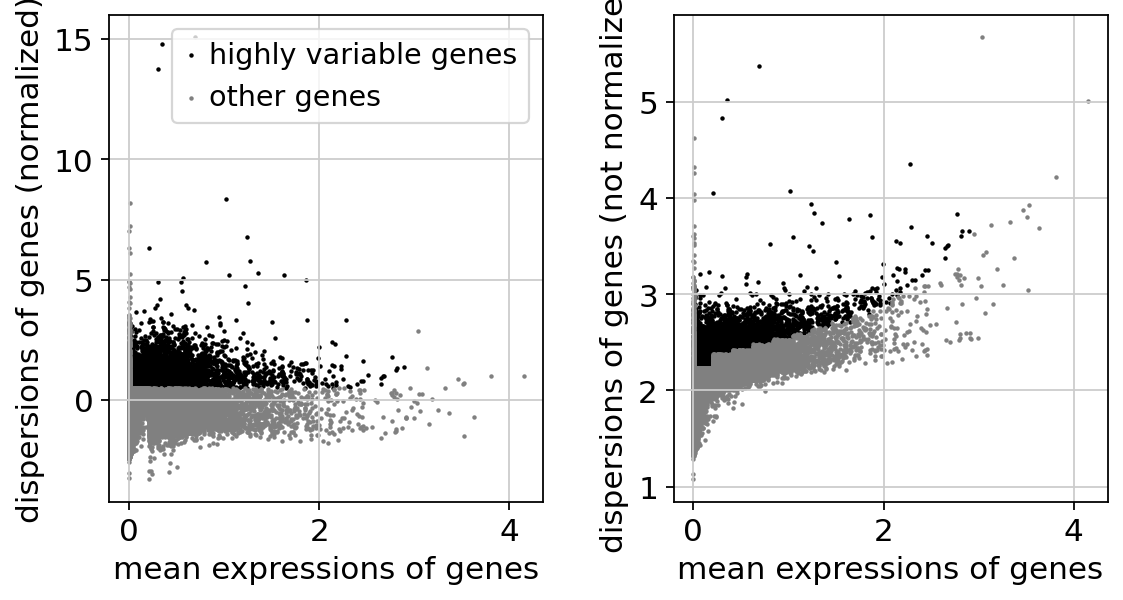

regressing out ['nCount_SCT']


/public/home/jijh/micromamba/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/public/home/jijh/micromamba/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/public/home/jijh/micromamba/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/public/home/jijh/micromamba/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/public/home/jijh/micromamba/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: T

    sparse input is densified and may lead to high memory use
    finished (0:03:24)
computing PCA
    with n_comps=50
    finished (0:00:37)


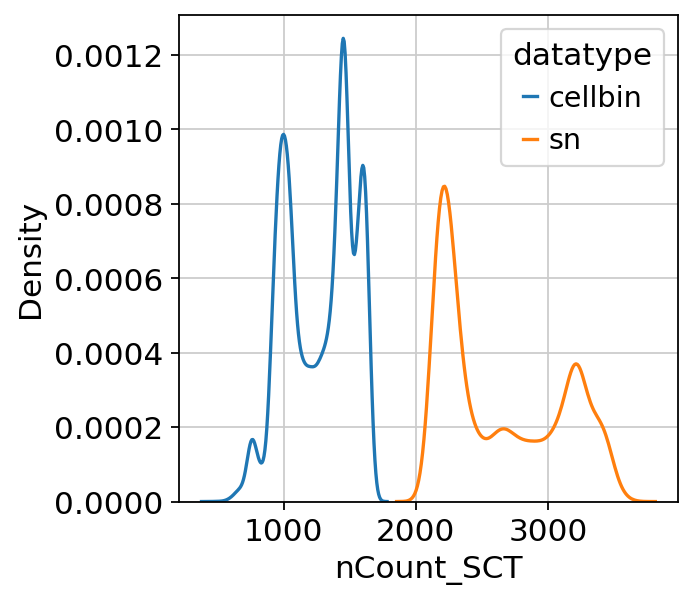

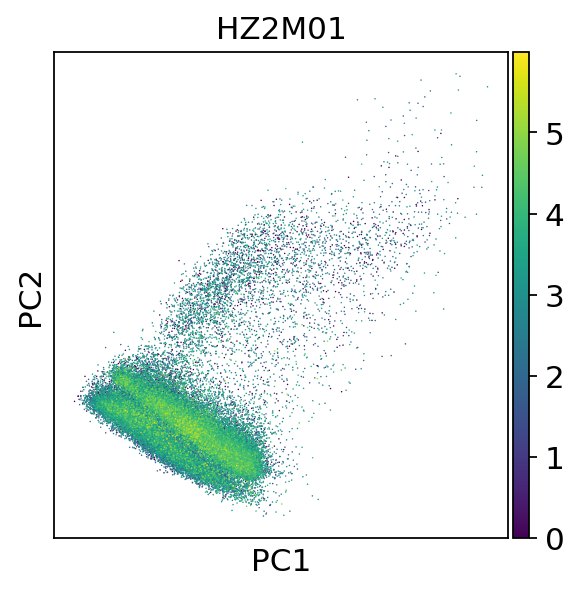

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:07)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:51)


2024-06-05 13:09:10,940 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-06-05 13:09:14,751 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-06-05 13:09:15,020 - harmonypy - INFO - Iteration 1 of 10
2024-06-05 13:09:33,853 - harmonypy - INFO - Iteration 2 of 10
2024-06-05 13:09:52,925 - harmonypy - INFO - Iteration 3 of 10
2024-06-05 13:10:11,369 - harmonypy - INFO - Iteration 4 of 10
2024-06-05 13:10:30,046 - harmonypy - INFO - Iteration 5 of 10
2024-06-05 13:10:48,447 - harmonypy - INFO - Iteration 6 of 10
2024-06-05 13:11:02,026 - harmonypy - INFO - Converged after 6 iterations


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:51)


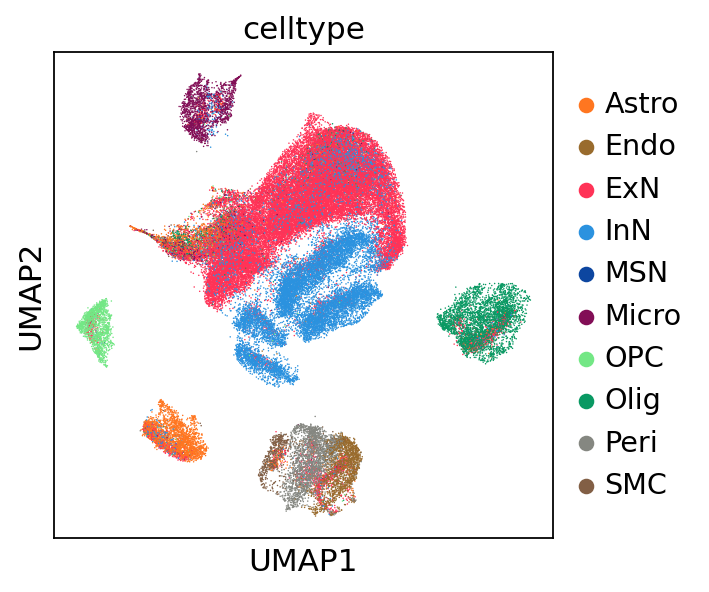

/public/home/jijh/micromamba/envs/spatial/lib/python3.11/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


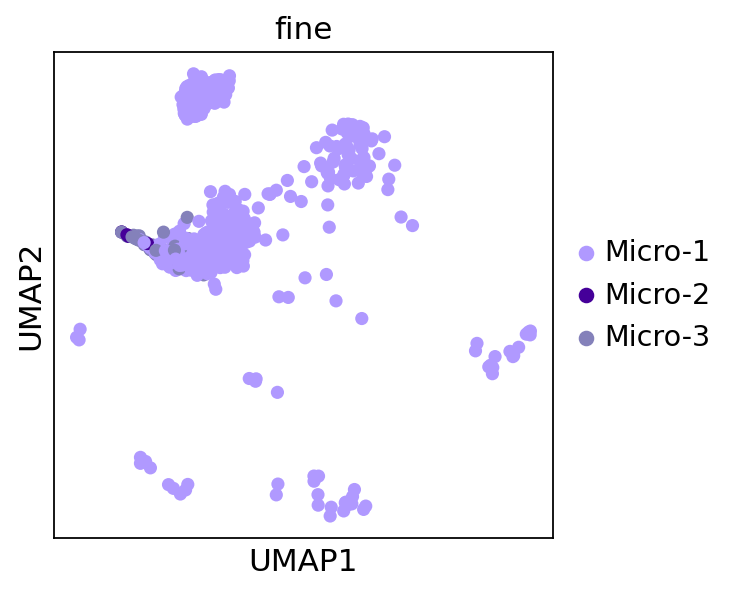

/public/home/jijh/micromamba/envs/spatial/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 408 disconnected components.
 There are 338 islands with ids: 14, 79, 106, 109, 114, 119, 153, 154, 155, 158, 159, 160, 190, 197, 201, 204, 205, 208, 209, 216, 221, 230, 250, 258, 268, 276, 279, 282, 289, 290, 291, 293, 310, 320, 323, 340, 344, 355, 358, 393, 394, 399, 403, 417, 433, 438, 455, 461, 463, 465, 474, 478, 497, 515, 518, 539, 541, 554, 564, 567, 568, 573, 577, 579, 584, 597, 602, 608, 622, 645, 670, 671, 681, 708, 711, 715, 724, 732, 734, 735, 737, 744, 745, 749, 760, 783, 789, 793, 801, 834, 845, 853, 859, 871, 885, 887, 890, 898, 905, 909, 918, 928, 945, 955, 963, 966, 976, 981, 991, 1002, 1010, 1016, 1026, 1039, 1040, 1048, 1056, 1059, 1067, 1070, 1076, 1079, 1082, 1089, 1090, 1118, 1131, 1143, 1156, 1164, 1170, 1179, 1183, 1212, 1214, 1227, 1229, 1230, 1237, 1242, 1247, 1250, 1275, 1295, 1307, 1312, 

('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 79, ' is an island (no neighbors)')
('WARNING: ', 106, ' is an island (no neighbors)')
('WARNING: ', 109, ' is an island (no neighbors)')
('WARNING: ', 114, ' is an island (no neighbors)')
('WARNING: ', 119, ' is an island (no neighbors)')
('WARNING: ', 153, ' is an island (no neighbors)')
('WARNING: ', 154, ' is an island (no neighbors)')
('WARNING: ', 155, ' is an island (no neighbors)')
('WARNING: ', 158, ' is an island (no neighbors)')
('WARNING: ', 159, ' is an island (no neighbors)')
('WARNING: ', 160, ' is an island (no neighbors)')
('WARNING: ', 190, ' is an island (no neighbors)')
('WARNING: ', 197, ' is an island (no neighbors)')
('WARNING: ', 201, ' is an island (no neighbors)')
('WARNING: ', 204, ' is an island (no neighbors)')
('WARNING: ', 205, ' is an island (no neighbors)')
('WARNING: ', 208, ' is an island (no neighbors)')
('WARNING: ', 209, ' is an island (no neighbors)')
('WARNING: ', 216, ' is an island

/public/home/jijh/micromamba/envs/spatial/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 276 disconnected components.
 There are 241 islands with ids: 1, 10, 15, 16, 20, 22, 23, 27, 31, 32, 39, 41, 46, 57, 73, 85, 86, 89, 90, 91, 94, 101, 103, 104, 108, 111, 116, 119, 121, 127, 135, 136, 137, 138, 141, 144, 148, 151, 152, 154, 155, 161, 167, 172, 173, 175, 176, 178, 181, 191, 193, 194, 195, 196, 204, 205, 207, 208, 210, 211, 214, 218, 222, 223, 228, 234, 238, 244, 248, 249, 250, 255, 257, 258, 259, 260, 261, 269, 270, 274, 275, 279, 281, 289, 290, 291, 296, 300, 308, 310, 313, 317, 319, 320, 330, 331, 341, 346, 347, 348, 351, 353, 354, 355, 362, 363, 369, 374, 380, 381, 383, 385, 386, 389, 390, 393, 398, 402, 406, 409, 411, 413, 417, 421, 428, 429, 432, 433, 440, 443, 444, 448, 453, 469, 471, 472, 476, 477, 478, 491, 492, 495, 502, 509, 518, 520, 523, 535, 536, 539, 543, 546, 547, 555, 556, 561, 563, 56

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 85, ' is an island (no neighbors)')
('WARNING: ', 86, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 91, ' is an island (no neighbors)')
(

/public/home/jijh/micromamba/envs/spatial/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 201 disconnected components.
 There are 189 islands with ids: 124, 134, 217, 242, 299, 321, 541, 587, 609, 637, 765, 811, 841, 891, 910, 912, 1022, 1076, 1245, 1301, 1408, 1526, 1638, 1699, 1735, 1737, 1800, 1844, 1906, 1907, 1955, 1998, 2032, 2179, 2386, 2578, 2593, 2794, 3088, 3174, 3235, 3596, 3684, 3822, 3836, 4081, 4179, 4328, 4418, 4486, 4576, 4605, 4707, 5140, 5173, 5208, 5214, 5287, 5424, 5501, 5576, 5753, 5814, 5839, 5883, 6540, 6570, 6849, 6880, 6949, 7085, 7160, 7282, 7627, 7729, 7882, 7901, 8113, 8118, 8176, 8188, 8442, 8878, 9554, 9714, 9779, 10031, 10171, 10707, 10913, 10989, 11089, 11178, 11219, 11700, 11795, 11938, 11963, 11977, 12151, 13171, 13186, 13192, 13416, 13475, 13619, 13758, 13865, 13993, 14126, 14134, 14303, 14336, 14932, 14973, 15164, 15165, 15698, 15794, 16425, 16574, 16607, 16709, 16824,

('WARNING: ', 124, ' is an island (no neighbors)')
('WARNING: ', 134, ' is an island (no neighbors)')
('WARNING: ', 217, ' is an island (no neighbors)')
('WARNING: ', 242, ' is an island (no neighbors)')
('WARNING: ', 299, ' is an island (no neighbors)')
('WARNING: ', 321, ' is an island (no neighbors)')
('WARNING: ', 541, ' is an island (no neighbors)')
('WARNING: ', 587, ' is an island (no neighbors)')
('WARNING: ', 609, ' is an island (no neighbors)')
('WARNING: ', 637, ' is an island (no neighbors)')
('WARNING: ', 765, ' is an island (no neighbors)')
('WARNING: ', 811, ' is an island (no neighbors)')
('WARNING: ', 841, ' is an island (no neighbors)')
('WARNING: ', 891, ' is an island (no neighbors)')
('WARNING: ', 910, ' is an island (no neighbors)')
('WARNING: ', 912, ' is an island (no neighbors)')
('WARNING: ', 1022, ' is an island (no neighbors)')
('WARNING: ', 1076, ' is an island (no neighbors)')
('WARNING: ', 1245, ' is an island (no neighbors)')
('WARNING: ', 1301, ' is an 

/public/home/jijh/micromamba/envs/spatial/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 236 disconnected components.
 There are 211 islands with ids: 0, 2, 5, 8, 11, 13, 16, 19, 22, 24, 32, 39, 42, 45, 47, 50, 53, 60, 62, 69, 77, 78, 79, 81, 86, 89, 100, 104, 110, 120, 128, 133, 163, 187, 203, 210, 218, 222, 227, 232, 244, 246, 249, 266, 270, 273, 275, 277, 281, 284, 285, 286, 301, 306, 317, 318, 322, 325, 326, 328, 331, 347, 359, 376, 380, 387, 388, 391, 406, 408, 416, 428, 429, 430, 447, 451, 453, 466, 487, 545, 564, 565, 575, 584, 589, 625, 656, 705, 747, 750, 755, 761, 781, 823, 827, 829, 841, 895, 917, 923, 925, 927, 935, 942, 943, 947, 961, 967, 975, 986, 992, 994, 1004, 1024, 1038, 1046, 1050, 1069, 1131, 1137, 1147, 1155, 1158, 1205, 1222, 1223, 1243, 1247, 1309, 1315, 1316, 1318, 1321, 1322, 1327, 1328, 1329, 1342, 1346, 1360, 1370, 1378, 1403, 1407, 1410, 1427, 1431, 1472, 1488, 1498, 1504, 1

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 53, ' is an island (no neighbors)')
('WARNING: ', 60, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/spatial/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 865 disconnected components.
 There are 737 islands with ids: 2, 7, 8, 9, 11, 15, 23, 25, 28, 31, 35, 37, 43, 47, 54, 65, 73, 74, 80, 85, 86, 100, 101, 102, 106, 111, 114, 120, 126, 127, 128, 131, 132, 133, 135, 140, 141, 153, 154, 155, 167, 168, 170, 171, 172, 179, 180, 182, 184, 204, 208, 223, 224, 228, 233, 234, 235, 242, 243, 248, 249, 254, 256, 258, 259, 261, 279, 282, 288, 292, 301, 303, 306, 311, 312, 314, 315, 320, 322, 323, 324, 325, 336, 346, 351, 352, 357, 360, 363, 373, 387, 390, 401, 404, 406, 407, 409, 416, 419, 425, 426, 435, 452, 453, 459, 468, 471, 473, 486, 498, 503, 514, 515, 518, 523, 525, 538, 544, 545, 546, 551, 558, 559, 579, 585, 595, 599, 600, 603, 605, 606, 609, 616, 624, 625, 640, 645, 646, 652, 661, 663, 671, 677, 681, 685, 688, 705, 708, 711, 714, 717, 719, 728, 737, 743, 744, 747, 748, 

('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 54, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 74, ' is an island (no neighbors)')
('WARNING: ', 80, ' is an island (no neighbors)')
('WARNING: ', 85, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/spatial/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 271 disconnected components.
 There are 214 islands with ids: 0, 3, 5, 8, 9, 10, 13, 17, 19, 21, 23, 24, 30, 31, 34, 35, 40, 41, 45, 46, 52, 58, 59, 65, 66, 68, 71, 74, 76, 77, 78, 79, 81, 83, 84, 89, 90, 91, 93, 94, 97, 101, 102, 103, 107, 108, 109, 113, 116, 119, 120, 124, 128, 133, 134, 138, 140, 144, 145, 153, 155, 157, 158, 159, 160, 166, 169, 171, 172, 174, 179, 183, 186, 189, 191, 195, 197, 206, 208, 213, 217, 218, 220, 221, 225, 227, 232, 235, 237, 238, 243, 244, 247, 249, 250, 254, 257, 259, 262, 264, 266, 267, 268, 269, 271, 272, 273, 275, 276, 278, 282, 283, 285, 288, 289, 290, 291, 292, 297, 299, 300, 302, 306, 313, 321, 322, 327, 330, 331, 335, 337, 339, 340, 342, 343, 346, 347, 349, 350, 351, 353, 354, 356, 357, 359, 360, 364, 365, 367, 368, 373, 375, 378, 379, 385, 390, 394, 395, 397, 400, 405, 406, 4

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WAR

In [19]:
for key, adata_sample in cellbin_data.items():
    print(f"Processing {key} sample")
    adata_pdf = cm.analysis.subset_anndata(adata_sample, {"Structure Name": "Prefrontal cortex"})
    adata_pdf.obs["datatype"] = "cellbin"
    merge_adata = cm.analysis.concatenate_and_intersect([adata_pdf, ref_pfc_sub])
    merge_adata.layers["counts"] = merge_adata.X
    merge_adata.obs["celltype"] = merge_adata.obs["fine"].str.split("-").str[0]
    
    sc.pp.normalize_total(merge_adata, target_sum=1e4)
    sc.pp.log1p(merge_adata)
    sc.pp.highly_variable_genes(merge_adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    sc.pl.highly_variable_genes(merge_adata)
    merge_adata.raw = merge_adata
    merge_adata = merge_adata[:, merge_adata.var.highly_variable]
    sns.kdeplot(data = merge_adata.obs, x = "nCount_SCT", hue = "datatype")
    # Start regress
    sc.pp.regress_out(merge_adata, ["nCount_SCT"])
    sc.pp.scale(merge_adata, max_value=10)
    sc.tl.pca(merge_adata, svd_solver="arpack")
    sc.pl.pca(merge_adata, color="Thy1", title = key)
    # Raw UMAP
    sc.pp.neighbors(merge_adata, n_neighbors=10, n_pcs=40)
    sc.tl.umap(merge_adata)
    merge_adata.obsm["X_pca_umap"] = merge_adata.obsm["X_umap"]
    # Harmony
    sc.external.pp.harmony_integrate(merge_adata, key="datatype")
    sc.pp.neighbors(merge_adata, n_neighbors=10, n_pcs=40, use_rep="X_pca_harmony")
    sc.tl.umap(merge_adata)
    merge_adata.obsm["X_harmony_umap"] = merge_adata.obsm["X_umap"]
    sc.pl.umap(merge_adata, color = "celltype", palette=cm.palettes.general_type_colors)
    mask = (merge_adata.obs["celltype"] == 'Micro') & (merge_adata.obs["datatype"] == 'cellbin')
    sc.pl.umap(merge_adata[mask], color = "fine", palette=cm.palettes.cell_type_colors)
    mask = merge_adata.obs["datatype"] == 'cellbin'
    nei_df = cm.analysis.compute_neighbor_moran_i_by_category(merge_adata[mask], "min_center_dist")
    # Store the result
    nei_df.to_csv(f"/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/regress_harmony/{key}_{region}_regress_moranI.csv")
    # Convert non-string columns to strings in the `obs` data frame=
    df = merge_adata.obs
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = df[column].astype(str).replace('nan', 'NA')
    merge_adata.obs = df
    # Now try writing the AnnData object again
    merge_adata.write(f"/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/regress_harmony/{key}_{region}_regress_harmony.h5ad")

In [17]:
# Convert non-string columns to strings in the `obs` data frame
merge_adata.obs = ensure_string_columns(merge_adata.obs)
# Now try writing the AnnData object again
merge_adata.write(f"/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/regress_harmony/{key}_{region}_regress_harmony.h5ad")

In [18]:
merge_adata

AnnData object with n_obs × n_vars = 66642 × 4201
    obs: 'Unnamed: 0', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y', 'fine', 'genotype', 'month', 'sample', 'slice', 'id_A', 'age', 'nearest_plaque', 'interval', 'min_center_dist', 'min_border_dist', 'plaque_region', 'celltype', 'nCount_SCT', 'nFeature_SCT', 'nearest_index', 'struct_id', 'acronym_x', 'id_B', 'atlas_id', 'name', 'acronym_y', 'st_level', 'ontology_id', 'hemisphere_id', 'weight', 'parent_structure_id', 'depth', 'graph_id', 'graph_order', 'structure_id_path', 'color_hex_triplet', 'neuro_name_structure_id', 'neuro_name_structure_id_path', 'failed', 'sphinx_id', 'structure_name_facet', 'failed_facet', 'safe_name', 'total_voxel_counts (10 um)', 'Structure independently delineated (not merged to form parents)', 'Major Division', '"Summary Structure" Level for Analyses', 'Structure Name', 'datatype', 'nCount_RNA', 'nFeature_RNA', 'batch', 'plaque', 'plaque_delta', 'percent.mito', 'percent.rb', 'RN

In [24]:
key

'HZ2M01'

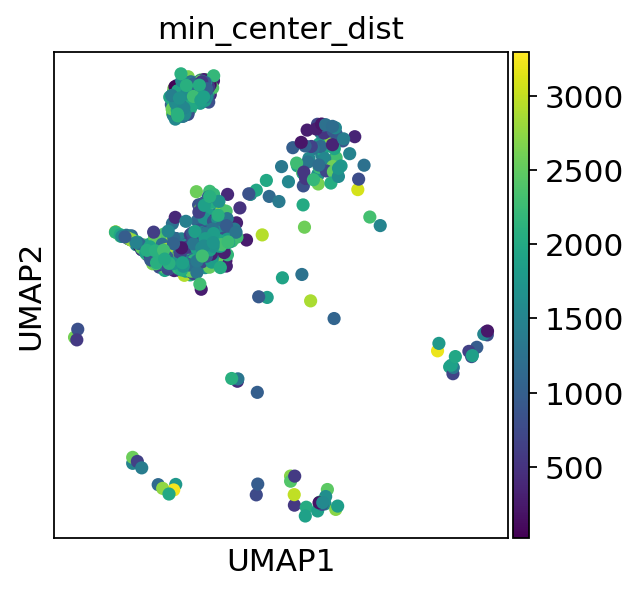

In [23]:
mask = (merge_adata.obs["celltype"] == 'Micro') & (merge_adata.obs["datatype"] == 'cellbin')
sc.pl.umap(merge_adata[mask], color = "min_center_dist", sort_order=False)

In [44]:
old = sc.read_h5ad("../../annotated_cell_bins/regress_harmony/HZ4M05_PFC_regress_harmony.h5ad")

In [41]:
old.obs["min_center_dist"] = old.obs["min_center_dist"].astype(float)

In [45]:
def plot_normalized_umap_single(
    adata,
    cell_type: str = "Micro",
    color: str = "min_center_dist",
    palette: dict = None,
    ax=None,
    **umap_kwargs
) -> plt.Axes:
    """
    Plots a UMAP projection with normalized values for the given AnnData object.

    Args:
        adata: The AnnData object.
        cell_type: The cell type to filter on for plotting. If None, plot all cells.
        color: The column name in `adata.obs` to normalize and plot.
        palette: Optional dictionary specifying the color palette to use if 'color' is categorical.
        ax: The axis to plot on. If None, a new figure and axis will be created.
        **umap_kwargs: Arbitrary keyword arguments to pass to the `sc.pl.umap` function.

    Returns:
        plt.Axes: The matplotlib axes object.
    """
    def normalize(values):
        min_val = values.min()
        max_val = values.max()
        return (values - min_val) / (max_val - min_val)

    tmp = adata.copy()

    if cell_type:
        mask = tmp.obs["celltype"] == cell_type
    else:
        mask = slice(None)  # Select all cells if cell_type is None

    if color == "min_center_dist":
        tmp.obs.loc[mask, f"{color}_normalized"] = normalize(tmp.obs.loc[mask, color])
        plot_color = f"{color}_normalized"
    else:
        plot_color = color

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    else:
        fig = None

    sc.pl.umap(tmp[mask], color=plot_color, vmin=0, vmax=1 if color == "min_center_dist" else None, 
               ax=ax, show=False, legend_loc="right margin" if isinstance(tmp.obs[color].iloc[0], str) else None, 
               palette=palette, **umap_kwargs)

    # Remove the border (spines) of the top and bottom axes
    for spine_position, spine in ax.spines.items():
        if spine_position in ['top', 'bottom']:
            spine.set_visible(False)
        else:
            spine.set_visible(True)
        
    ax.set_xlabel("")
    ax.set_ylabel("")

    if isinstance(tmp.obs[color].iloc[0], (int, float, complex)):
        if fig:
            cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
            norm = plt.Normalize(vmin=0, vmax=1)
            sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
            sm.set_array([])
            cbar = fig.colorbar(sm, cax=cbar_ax)
            cbar.set_label(f'{color}_normalized')

    if fig:
        plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the color bar
        plt.close(fig)  # Close the figure to avoid displaying it separately

    return ax


<Axes: title={'center': 'min_center_dist_normalized'}>

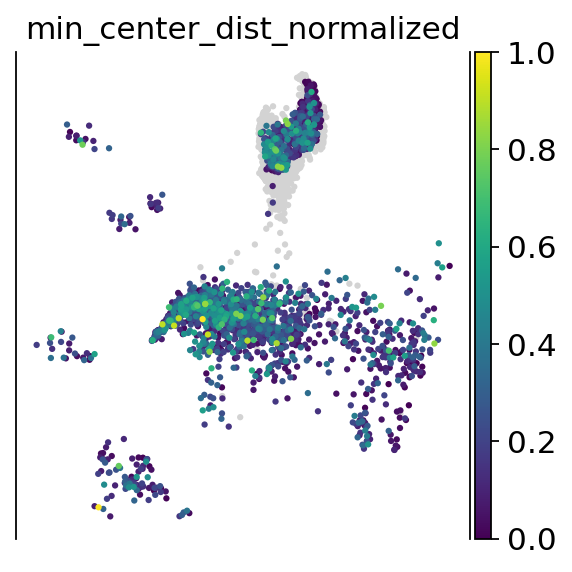

In [46]:
fig, ax = plt.subplots(1,1,figsize = (4,4))
plot_normalized_umap_single(old, ax = ax)